# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities


Number of cities in the list: 610


['grytviken',
 'port-aux-francais',
 'batang',
 'kiruna',
 'adamstown',
 'vilyuchinsk',
 'isafjordur',
 'stanley',
 'shubarshi',
 'taiohae',
 'albany',
 'ranchettes',
 'bredasdorp',
 'invercargill',
 'cloverdale',
 'hermanus',
 'portland',
 'papao',
 'edinburgh of the seven seas',
 'macau',
 'tanjungtiram',
 'shubarkuduk',
 'ushuaia',
 'muli',
 'nikolayevsk-on-amure',
 'bloemfontein',
 'villa de costa rica',
 'kongsvinger',
 'bay roberts',
 'saratamata',
 'tweed heads',
 'mount gambier',
 'standerton',
 'waitangi',
 'kani keli',
 'puerto natales',
 'port mathurin',
 'sur',
 'usogorsk',
 'hamilton',
 'nan',
 'petrovskaya',
 'whitehorse',
 'saipan',
 'geraldton',
 'puerto san jose',
 'hadibu',
 'kayangel',
 'okha',
 'petropavlovsk-kamchatsky',
 'georgetown',
 'thompson',
 'kenai',
 'aasiaat',
 'fauske',
 'prince george',
 'puerto ayora',
 'port shepstone',
 "kapa'a",
 'bowen',
 'awjilah',
 'mutare',
 'chonchi',
 'blackmans bay',
 'island harbour',
 'tranovaho',
 'qaqortoq',
 'bilibino',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
            # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | batang
Processing Record 4 of Set 1 | kiruna
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | shubarshi
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ranchettes
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | cloverdale
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | papao
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | macau
Processing Record 21 of Set 1 | tanjungtiram
Processing Record 22 of 

Processing Record 37 of Set 4 | saint-denis
Processing Record 38 of Set 4 | tolanaro
Processing Record 39 of Set 4 | kurumkan
Processing Record 40 of Set 4 | olonkinbyen
Processing Record 41 of Set 4 | atafu village
Processing Record 42 of Set 4 | buta
Processing Record 43 of Set 4 | niquero
Processing Record 44 of Set 4 | fisterra
Processing Record 45 of Set 4 | songea
Processing Record 46 of Set 4 | penalva
Processing Record 47 of Set 4 | mirnyy
Processing Record 48 of Set 4 | sinabang
Processing Record 49 of Set 4 | akjoujt
Processing Record 0 of Set 5 | visby
Processing Record 1 of Set 5 | pokhara
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | ulsteinvik
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | adigrat
Processing Record 6 of Set 5 | n'dalatando
Processing Record 7 of Set 5 | bandon
Processing Record 8 of Set 5 | vorgashor
Processing Record 9 of Set 5 | cheltenham
Processing Record 10 of Set 5 | kerikeri
Processing Record 11 o

Processing Record 32 of Set 8 | araxa
Processing Record 33 of Set 8 | pandan
Processing Record 34 of Set 8 | miri
Processing Record 35 of Set 8 | geroskipou
City not found. Skipping...
Processing Record 36 of Set 8 | laminusa
Processing Record 37 of Set 8 | selebi-phikwe
Processing Record 38 of Set 8 | chui
Processing Record 39 of Set 8 | tucuma
Processing Record 40 of Set 8 | chernyshevskiy
Processing Record 41 of Set 8 | 'izbat al burj
City not found. Skipping...
Processing Record 42 of Set 8 | villa gesell
Processing Record 43 of Set 8 | tomohon
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | robertsport
Processing Record 46 of Set 8 | east london
Processing Record 47 of Set 8 | susuman
Processing Record 48 of Set 8 | boryeong
Processing Record 49 of Set 8 | westport
Processing Record 0 of Set 9 | cabedelo
Processing Record 1 of Set 9 | bairnsdale
Processing Record 2 of Set 9 | bentota
Processing Record 3 of Set 9 | entebbe
Processing Record 4 of Set 9 | aljez

Processing Record 20 of Set 12 | vanino
Processing Record 21 of Set 12 | burang
Processing Record 22 of Set 12 | brookings
Processing Record 23 of Set 12 | rio de janeiro
Processing Record 24 of Set 12 | yamada
Processing Record 25 of Set 12 | yanam
Processing Record 26 of Set 12 | hasaki
Processing Record 27 of Set 12 | umm kaddadah
Processing Record 28 of Set 12 | prado
Processing Record 29 of Set 12 | uray
Processing Record 30 of Set 12 | bac lieu
Processing Record 31 of Set 12 | noumea
Processing Record 32 of Set 12 | sao raimundo nonato
Processing Record 33 of Set 12 | new ulm
Processing Record 34 of Set 12 | gaspe
Processing Record 35 of Set 12 | pisco
Processing Record 36 of Set 12 | woods creek
Processing Record 37 of Set 12 | cannonvale
Processing Record 38 of Set 12 | abalak
Processing Record 39 of Set 12 | xuddur
Processing Record 40 of Set 12 | prainha
Processing Record 41 of Set 12 | nerva
Processing Record 42 of Set 12 | loei
Processing Record 43 of Set 12 | ta`u
Processi

In [12]:
city_data

[{'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 273.95,
  'Humidity': 84,
  'Cloudiness': 95,
  'Wind Speed': 2.38,
  'Country': 'GS',
  'Date': 1700782072},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 280.34,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 19.35,
  'Country': 'TF',
  'Date': 1700782054},
 {'City': 'batang',
  'Lat': -6.4846,
  'Lng': 110.7083,
  'Max Temp': 300.48,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'ID',
  'Date': 1700781682},
 {'City': 'kiruna',
  'Lat': 67.8557,
  'Lng': 20.2251,
  'Max Temp': 259.66,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 1.03,
  'Country': 'SE',
  'Date': 1700782458},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 294.97,
  'Humidity': 75,
  'Cloudiness': 100,
  'Wind Speed': 6.26,
  'Country': 'PN',
  'Date': 1700782087},
 {'City': 'vilyuchinsk',
  'Lat': 52.9306,
  'Lng': 158.4028,
  'Max Temp'

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,273.95,84,95,2.38,GS,1700782072
1,port-aux-francais,-49.3500,70.2167,280.34,96,100,19.35,TF,1700782054
2,batang,-6.4846,110.7083,300.48,78,100,1.54,ID,1700781682
3,kiruna,67.8557,20.2251,259.66,92,100,1.03,SE,1700782458
4,adamstown,-25.0660,-130.1015,294.97,75,100,6.26,PN,1700782087


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,273.95,84,95,2.38,GS,1700782072
1,port-aux-francais,-49.3500,70.2167,280.34,96,100,19.35,TF,1700782054
2,batang,-6.4846,110.7083,300.48,78,100,1.54,ID,1700781682
3,kiruna,67.8557,20.2251,259.66,92,100,1.03,SE,1700782458
4,adamstown,-25.0660,-130.1015,294.97,75,100,6.26,PN,1700782087


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

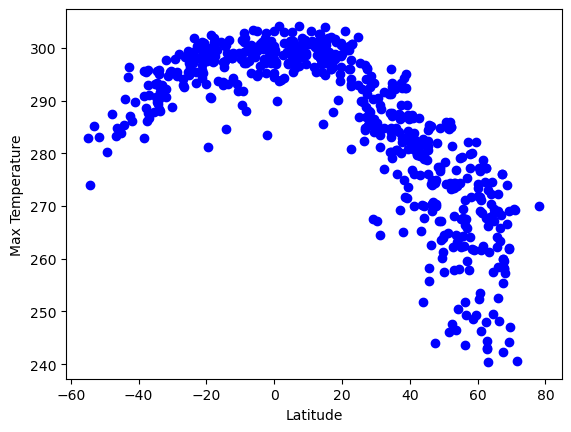

In [18]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df['Max Temp'], marker='o', color='b')

# Incorporate the other graph properties
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

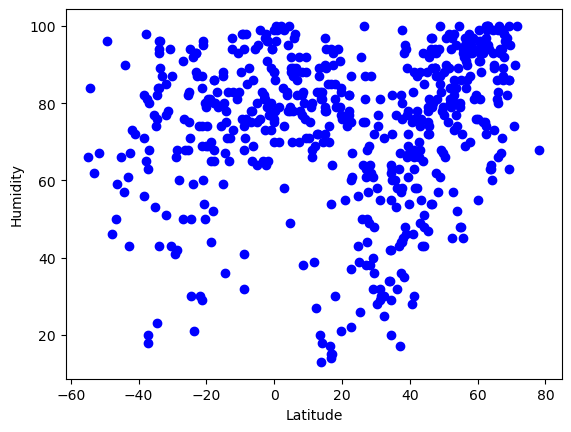

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ='o', color ='b')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

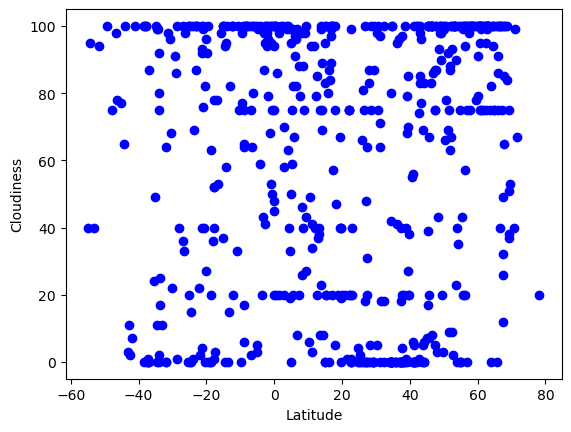

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ='o', color ='b')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

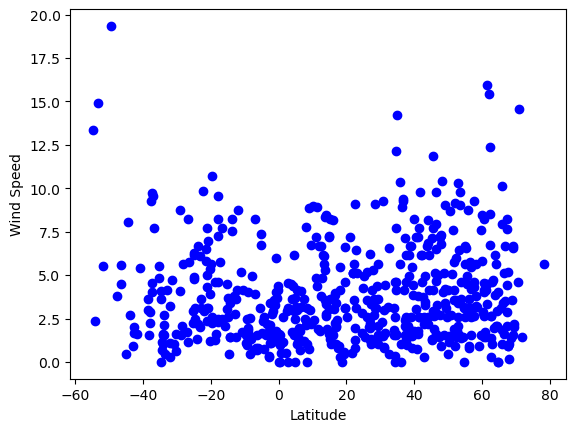

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ='o', color ='b')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(city_data_df)

# Create a line equation based on the regression model
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kiruna,67.8557,20.2251,259.66,92,100,1.03,SE,1700782458
5,vilyuchinsk,52.9306,158.4028,274.30,98,100,3.38,RU,1700782458
6,isafjordur,66.0755,-23.1240,269.16,66,91,3.40,IS,1700782135
7,stanley,54.8680,-1.6985,279.14,79,0,5.66,GB,1700782460
8,shubarshi,48.5872,57.1869,267.09,94,93,4.00,KZ,1700782460


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,273.95,84,95,2.38,GS,1700782072
1,port-aux-francais,-49.3500,70.2167,280.34,96,100,19.35,TF,1700782054
2,batang,-6.4846,110.7083,300.48,78,100,1.54,ID,1700781682
4,adamstown,-25.0660,-130.1015,294.97,75,100,6.26,PN,1700782087
11,bredasdorp,-34.5322,20.0403,289.79,76,99,0.71,ZA,1700782150


###  Temperature vs. Latitude Linear Regression Plot

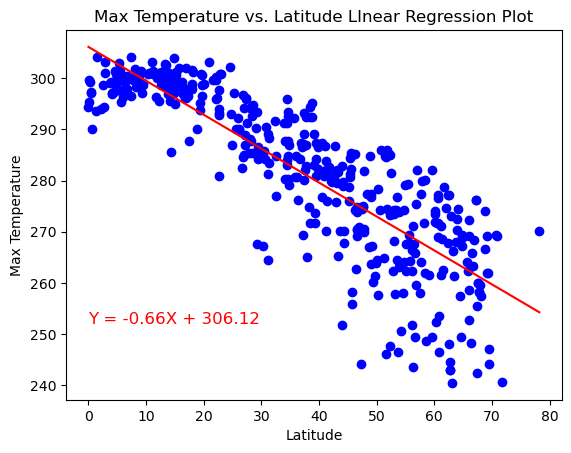

In [57]:
# Linear regression on Northern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Generate x values for the regression line
x_values = np.linspace(northern_hemi_df["Lat"].min(), northern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude LInear Regression Plot")


# Show the plot
plt.show()

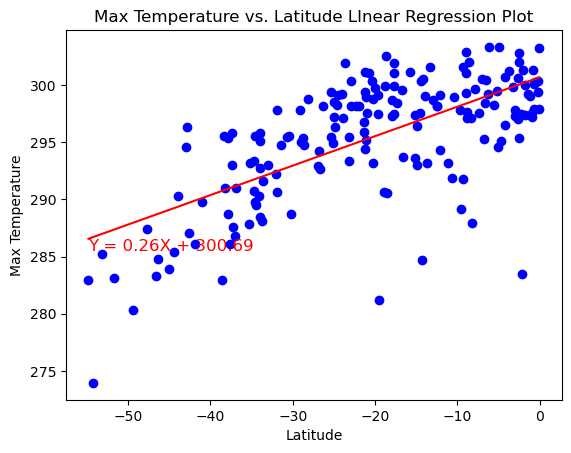

In [61]:
# Linear regression on Southern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Generate x values for the regression line
x_values = np.linspace(southern_hemi_df["Lat"].min(), southern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')


# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

**Discussion about the linear relationship:** Above 0 degrees Latitude, there is a negative correlation between maximum temperature and latitude. Below 0 degrees, there is a positive correlation between maximum temperature and latitude.
This aligns with what we see in observed reality, where the temperature tends to be highest at the equator and much colder as we go to the highest and lowest points of the earth.

### Humidity vs. Latitude Linear Regression Plot

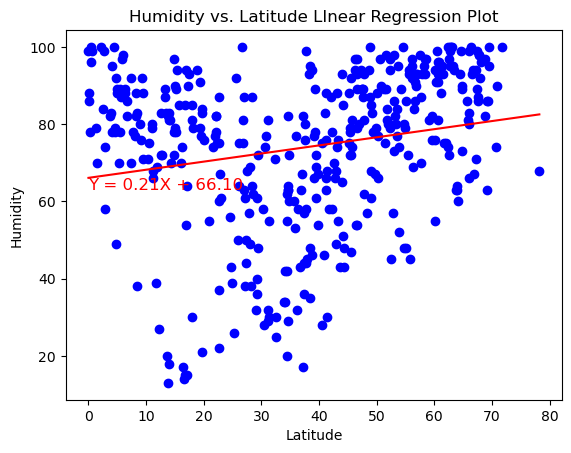

In [62]:
# Northern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Generate x values for the regression line
x_values = np.linspace(northern_hemi_df["Lat"].min(), northern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

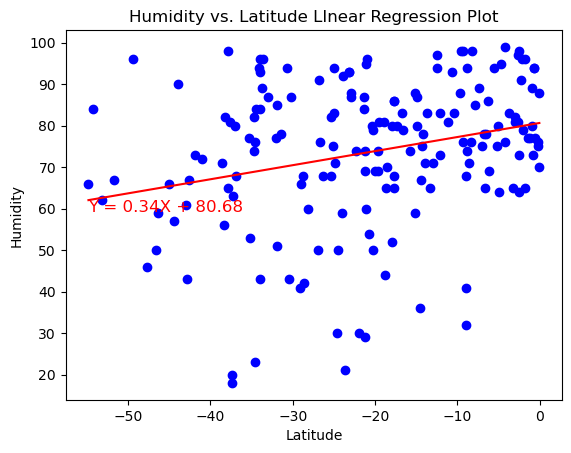

In [63]:
# Southern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Generate x values for the regression line
x_values = np.linspace(southern_hemi_df["Lat"].min(), southern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

**Discussion about the linear relationship:** There appears to be a positive correlation between latitude and humidity. As latitude increases, humidity also increases. 

### Cloudiness vs. Latitude Linear Regression Plot

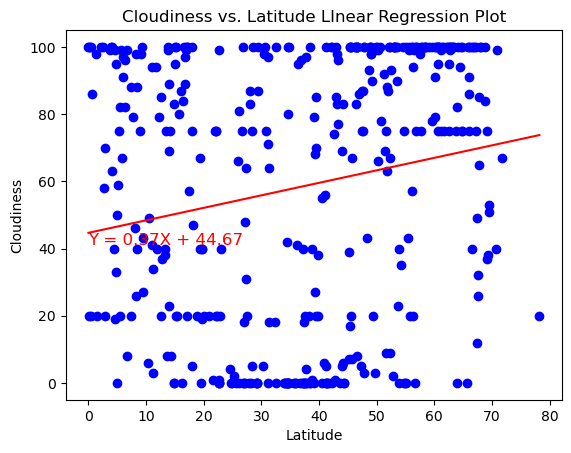

In [64]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Generate x values for the regression line
x_values = np.linspace(northern_hemi_df["Lat"].min(), northern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

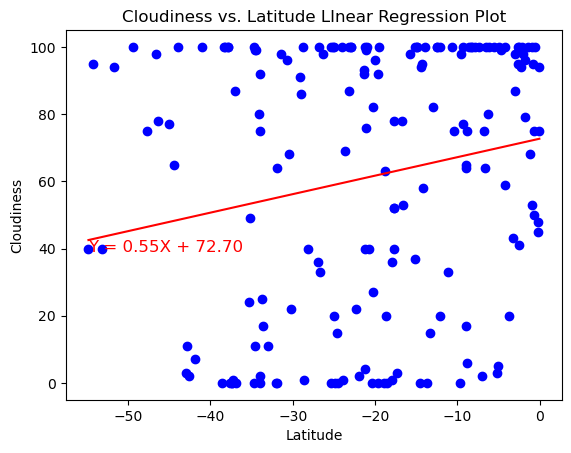

In [65]:
# Southern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Generate x values for the regression line
x_values = np.linspace(southern_hemi_df["Lat"].min(), southern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

**Discussion about the linear relationship:** There appears to be a positive correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

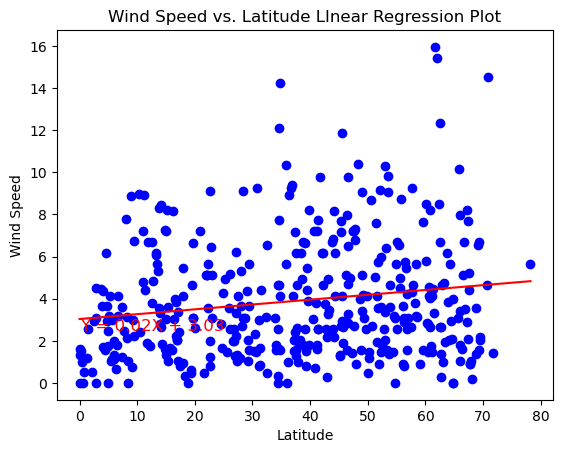

In [66]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Generate x values for the regression line
x_values = np.linspace(northern_hemi_df["Lat"].min(), northern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

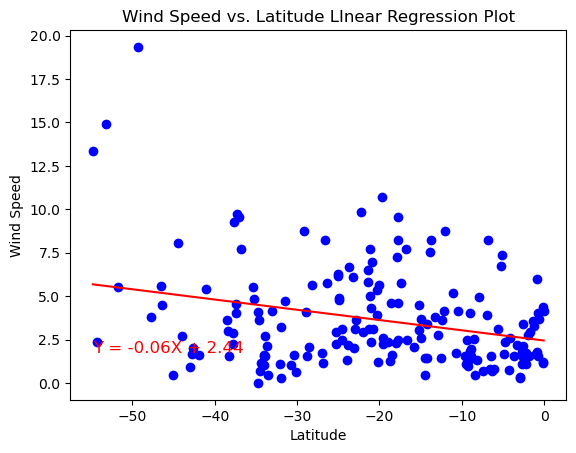

In [67]:
# Southern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Generate x values for the regression line
x_values = np.linspace(southern_hemi_df["Lat"].min(), southern_hemi_df["Lat"].max(), 100)

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker='o', color='b')

# Plot the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.text(x_values.min(), regression_line.min(), equation, color='r', fontsize=12, ha='left', va='top')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude LInear Regression Plot")

# Show the plot
plt.show()

**Discussion about the linear relationship:** There is a positive correlation between wind speed and latitude, above 0 degrees latitude, and a negative correlation between wind speed and latitude, below 0 degrees latitude. 